In [1]:
import tonic

dataset = tonic.datasets.NMNIST(save_to='./data', train=True)
events, target = dataset[0]
print(events)

/home/matthew/miniconda3/envs/snnenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1011894272it [05:48, 2907304.02it/s]                                


Extracting ./data/NMNIST/train.zip to ./data/NMNIST
[(10, 30,    937, 1) (33, 20,   1030, 1) (12, 27,   1052, 1) ...
 ( 7, 15, 302706, 1) (26, 11, 303852, 1) (11, 17, 305341, 1)]


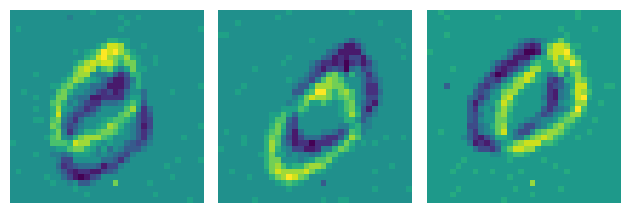

In [2]:
tonic.utils.plot_event_grid(events)

In [3]:
import tonic.transforms as transforms

sensor_size = tonic.datasets.NMNIST.sensor_size

# Denoise removes isolated, one-off events
# time_window
frame_transform = transforms.Compose([transforms.Denoise(filter_time=10000), 
                                      transforms.ToFrame(sensor_size=sensor_size, 
                                                         time_window=1000)
                                     ])

trainset = tonic.datasets.NMNIST(save_to='./tmp/data', transform=frame_transform, train=True)
testset = tonic.datasets.NMNIST(save_to='./tmp/data', transform=frame_transform, train=False)

1011894272it [05:45, 2930083.47it/s]                                


Extracting ./tmp/data/NMNIST/train.zip to ./tmp/data/NMNIST


169675776it [00:46, 3681617.93it/s]                               


Extracting ./tmp/data/NMNIST/test.zip to ./tmp/data/NMNIST


In [4]:
def load_sample_simple():
    for i in range(100):
        events, target = trainset[i]

In [5]:
%timeit -o load_sample_simple()

1.31 s ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 1.31 s ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [6]:
from torch.utils.data import DataLoader
from tonic import DiskCachedDataset

cached_trainset = DiskCachedDataset(trainset, cache_path='./cache/nmnist/train')
cached_dataloader = DataLoader(cached_trainset)

batch_size = 128
trainloader = DataLoader(cached_trainset, batch_size=batch_size, collate_fn=tonic.collation.PadTensors())

In [7]:
def load_sample_batched():
    events, target = next(iter(cached_dataloader))

In [8]:
%timeit -o -r 10 load_sample_batched()

18.9 ms ± 389 μs per loop (mean ± std. dev. of 10 runs, 10 loops each)


<TimeitResult : 18.9 ms ± 389 μs per loop (mean ± std. dev. of 10 runs, 10 loops each)>

In [9]:
from tonic import MemoryCachedDataset

cached_trainset = MemoryCachedDataset(trainset)